### Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('white')

In [3]:
df = pd.read_csv("./segmentation data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


#### Dropping the unwanted columns

In [4]:
df.drop(columns='ID', inplace= True)

#### Descriptive statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,2000.0,0.4570,0.498272,0.0,0.00,0.0,1.00,1.0
Marital status,2000.0,0.4965,0.500113,0.0,0.00,0.0,1.00,1.0
Age,2000.0,35.9090,11.719402,18.0,27.00,33.0,42.00,76.0
Education,2000.0,1.0380,0.599780,0.0,1.00,1.0,1.00,3.0
Income,2000.0,120954.4190,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0
Occupation,2000.0,0.8105,0.638587,0.0,0.00,1.0,1.00,2.0
Settlement size,2000.0,0.7390,0.812533,0.0,0.00,1.0,1.00,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


#### Checking for null values

In [7]:
df.isnull().mean()*100

Sex                0.0
Marital status     0.0
Age                0.0
Education          0.0
Income             0.0
Occupation         0.0
Settlement size    0.0
dtype: float64

##### No null values.

#### Checking for duplicated values

In [8]:
df.duplicated().sum()

0

##### No duplicate values.

In [9]:
df.shape

(2000, 7)

### Explorative data analysis

##### Univariate analysis

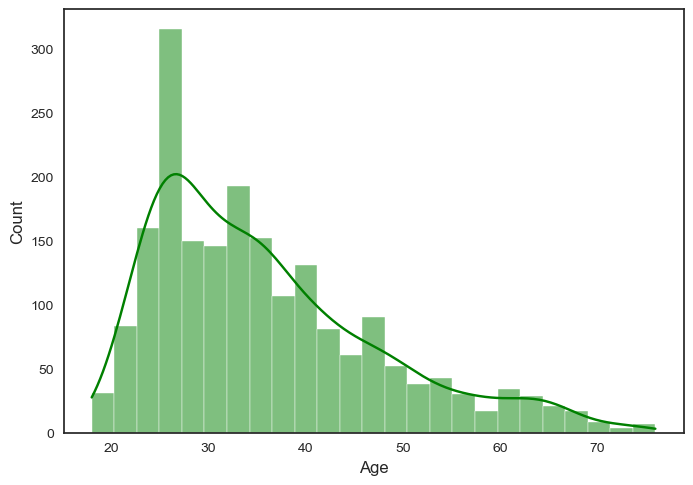

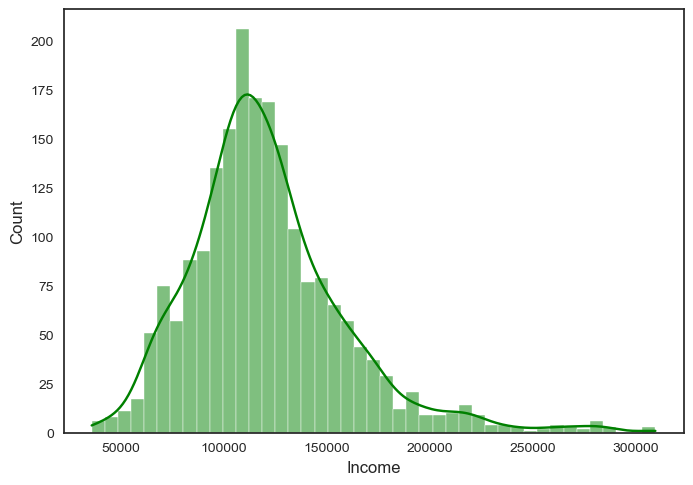

In [10]:
columns = ['Age', 'Income']
for i in columns:
    sns.histplot(x = df[i], kde = True, color= 'green',)
    plt.show()

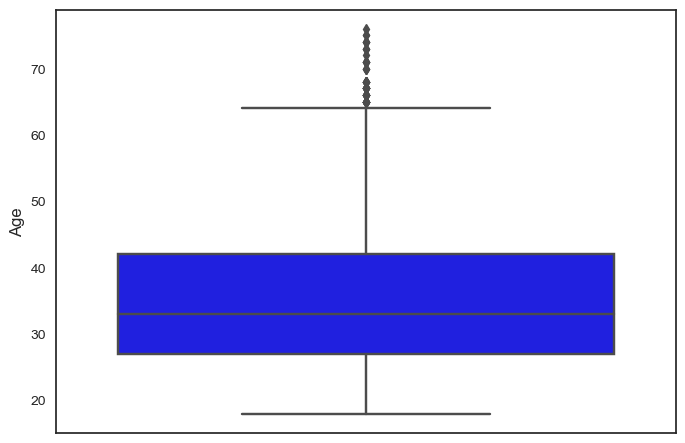

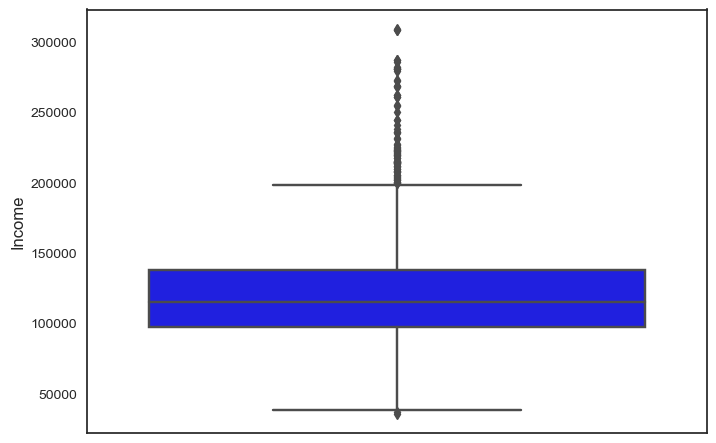

In [11]:
for i in columns:
    sns.boxplot(y = df[i], color= 'blue',)
    plt.show()

In [12]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

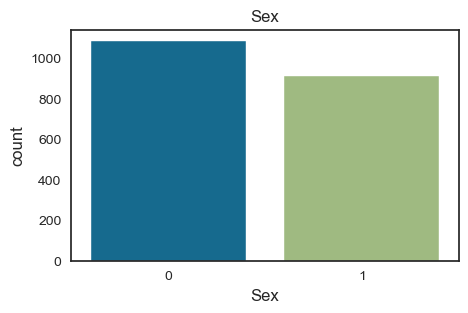

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = 'Sex')
plt.title("Sex")
plt.show()

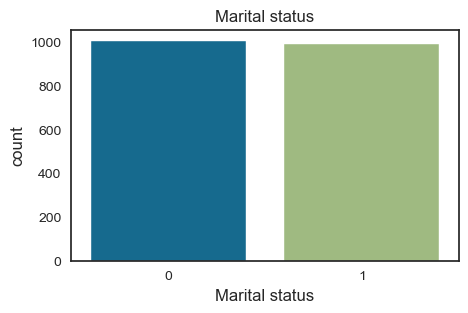

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = 'Marital status')
plt.title("Marital status")
plt.show()

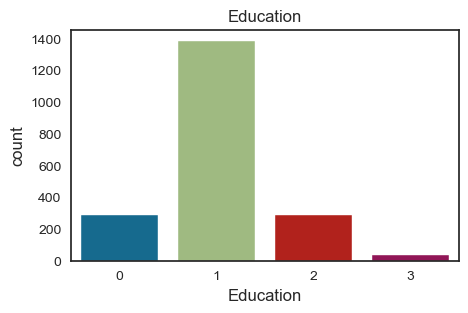

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = 'Education')
plt.title("Education")
plt.show()

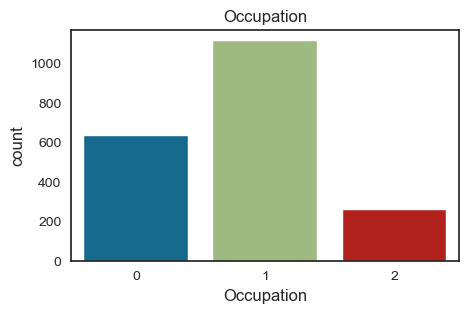

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = 'Occupation')
plt.title("Occupation")
plt.show()

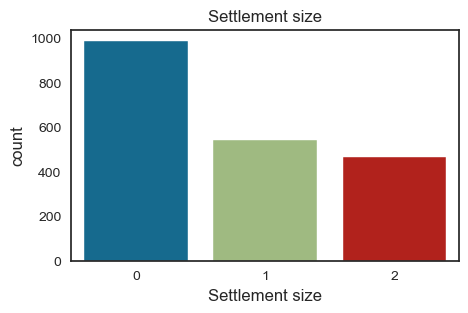

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = 'Settlement size')
plt.title("Settlement size")
plt.show()

##### Multivariate analysis

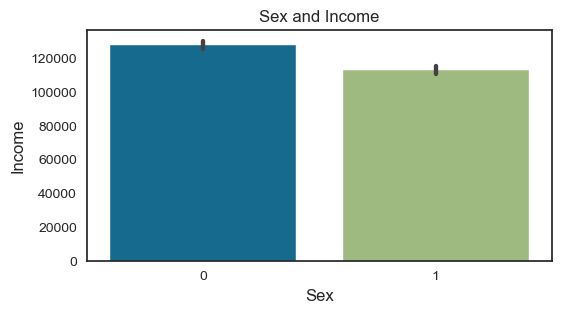

In [18]:
plt.figure(figsize=(6,3))
sns.barplot(data = df, x = 'Sex', y = 'Income')
plt.title("Sex and Income")
plt.show()

In [19]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

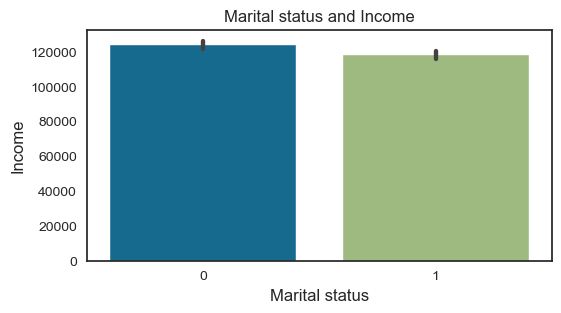

In [20]:
plt.figure(figsize=(6,3))
sns.barplot(data = df, x = 'Marital status', y = 'Income')
plt.title("Marital status and Income")
plt.show()

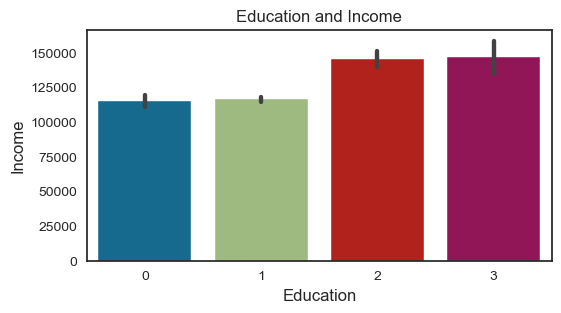

In [21]:
plt.figure(figsize=(6,3))
sns.barplot(data = df, x = 'Education', y = 'Income')
plt.title("Education and Income")
plt.show()

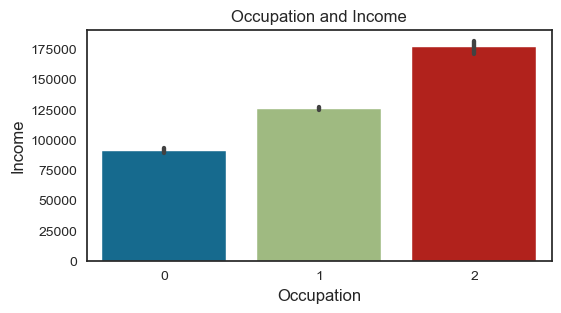

In [22]:
plt.figure(figsize=(6,3))
sns.barplot(data = df, x = 'Occupation', y = 'Income')
plt.title("Occupation and Income")
plt.show()

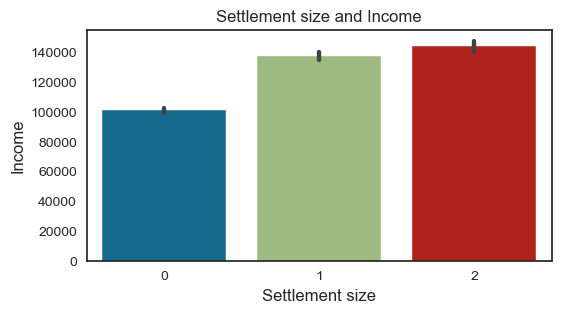

In [23]:
plt.figure(figsize=(6,3))
sns.barplot(data = df, x = 'Settlement size', y = 'Income')
plt.title("Settlement size and Income")
plt.show()

#### Visualizing the data points

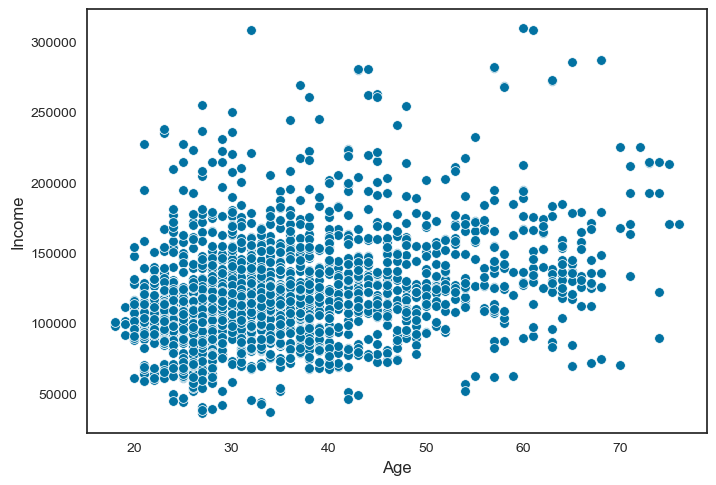

In [24]:
sns.scatterplot(data= df, x = 'Age', y = 'Income')
plt.show()

#### KMeans Modelling

#### The Elbow Method

In [25]:
k_means_yellowbrick = KMeans()

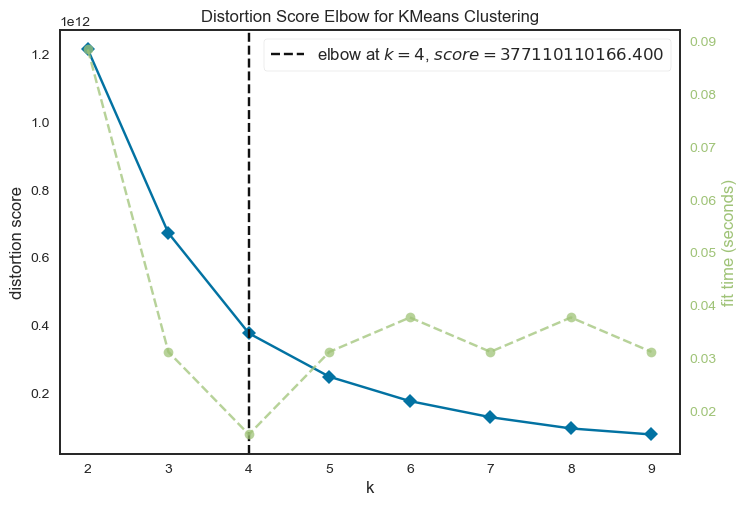

In [26]:
graph = KElbowVisualizer(k_means_yellowbrick, k= range(2,10))
graph.fit(df)
graph.poof();

In [27]:
KM = KMeans(n_clusters= 4, random_state= 42)

In [28]:
KM.fit(df)

KMeans(n_clusters=4, random_state=42)

#### Adding the Cluster_id to the DataFrame

In [29]:
labels = KM.labels_

In [30]:
df['Cluster_id'] = labels

In [31]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster_id
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3


#### Silhouette score
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering
technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly
distinguished.

In [32]:
silhouette_score(df, labels)

0.5428478939907716

##### We can infer that the value is 0.54, hence our model is neither good or bad.

### Plotting the Clusters

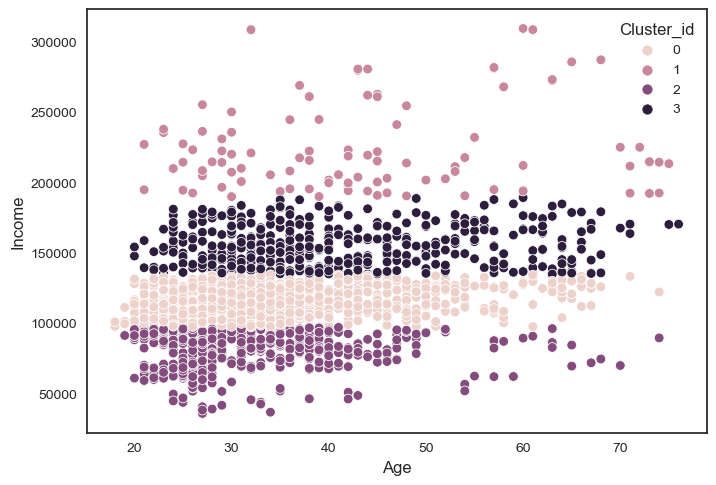

In [33]:
sns.scatterplot(data = df, x = 'Age', y = 'Income', hue = 'Cluster_id')
plt.show()

### Silhouette Plot

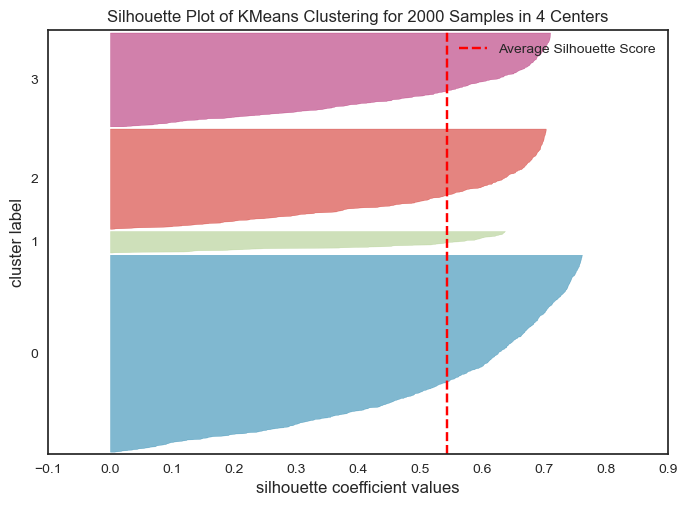

In [34]:
visualizer = SilhouetteVisualizer(KM, colors= 'yellowbrick')
visualizer.fit(df.drop(columns = 'Cluster_id'))
visualizer.show();

In [35]:
df.Cluster_id.value_counts()

Cluster_id
0    954
2    486
3    455
1    105
Name: count, dtype: int64

#### Cluster Sizes

In [36]:
KM_Cluster_sizes = df.groupby(['Cluster_id']).size().to_frame()
KM_Cluster_sizes.columns = ['KM_Cluster_Size']

In [37]:
KM_Cluster_sizes

,KM_Cluster_Size
Cluster_id,
0,954
1,105
2,486
3,455
